In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from test.models.std_normal import StdNormal
from bayes_kit.drhmc import DRHMC

# autoreload modules with jupyter magic
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def test_drhmc_diag_std_normal() -> None:
    # init with draw from posterior
    init = np.random.normal(loc=0, scale=1, size=[1])
    model = StdNormal()
    num_proposals = 1
    stepsize_fn, steps_fn = lambda t: 0.25, lambda t: 10
    drhmc = DRHMC(model, num_proposals, stepsize_fn, steps_fn, init=init)

    M = 10000
    draws = np.array([drhmc.sample()[0] for _ in range(M)])

    # plot histogram of draws
    plt.hist(draws, bins=100)
    mean = draws.mean(axis=0)
    var = draws.var(axis=0, ddof=1)

    return draws
    np.testing.assert_allclose(mean, model.posterior_mean(), atol=0.1)
    np.testing.assert_allclose(var, model.posterior_variance(), atol=0.1)
    

0.7429459405252382
1.1591059469457803
0.95655393215454
1.6732720116877478
0.5316673039270917
1.1910142037700682
0.8404002296421113
1.002092131712194
2.2721297561659815
0.7280319392831458
0.8071102665505397
0.76023223898722
1.0181229959772822
1.266125185046664
1.153884279052254
0.8020797107401899
0.9210708432953433
1.3305707719970348
0.6759391029006343
1.0165720221390429
0.9990321905279892
0.9902179420557481
1.7503527821633944
1.248024535327208
0.663924367226862
0.8524472829707266
2.476396024349455
2.881227534170008
0.23040020035031844
0.5236832495478487
0.9561971883539443
1.0389243871555272
1.0764837992923832
0.874172342796818
1.0497286157254586
1.027746656794845
1.2155649637293882
0.8163169130894837
0.9498952909492545
1.0392726104832228
0.9398796658039442
1.1162897430947762
1.3127875675210148
1.3351331477707606
1.0217869464618496
3.4318526376757155
1.4079826754585754
2.670062689337072
1.8740244507323365
0.7693554024130543
0.29639411487686596
0.5767080179962544
0.17988456901183153
0.87

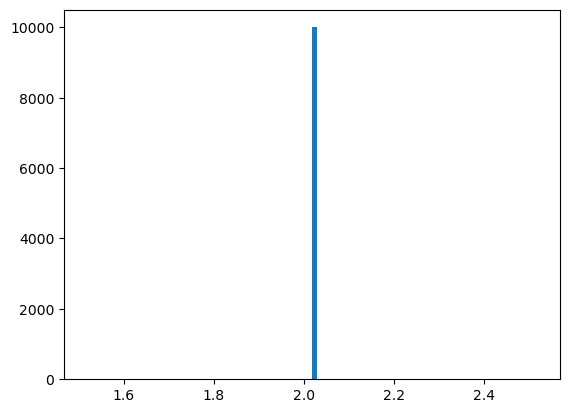

In [28]:
draws = test_drhmc_diag_std_normal()